# PyGam

GAMs (Generalized Additive Models) are a great way to get quick and dirty interpolation of spatial surfaces going. Basically you model arbitrary curves as linear combinations of basis functions. A great visual recap found here:
https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html#Introduction




In [1]:
import pygam 
import numpy as np
from pygam.datasets import wage
from pygam.datasets import mcycle
import matplotlib.pyplot as plt

as a first pass let's follow along the tutorial here:
https://pygam.readthedocs.io/en/latest/notebooks/quick_start.html#Fit-a-Model


### Explore Data

This tutorial is based on the wage data found in the GAMs section of the ISLR (7.7 in the 2023 printing)

In [3]:
x, y = wage()

In [4]:
titles = ['year', 'age', 'education'] # predictors

In [5]:
np.shape(x)

(3000, 3)

In [6]:
np.shape(y)

(3000,)

Text(0.5, 1.0, 'Wage')

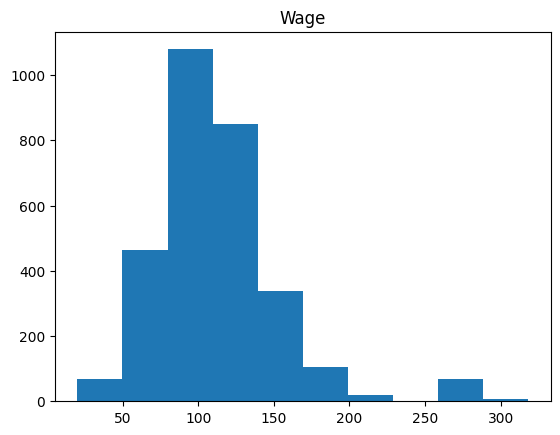

In [13]:
plt.hist(y)
plt.title('Wage')

Text(0.5, 1.0, 'Wage vs Year')

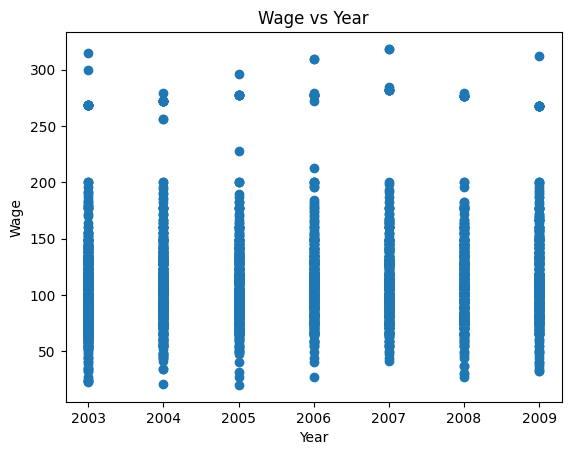

In [8]:
plt.scatter(x[:,0], y)
plt.xlabel("Year")
plt.ylabel("Wage")
plt.title("Wage vs Year")

Text(0.5, 1.0, 'Wage vs Age')

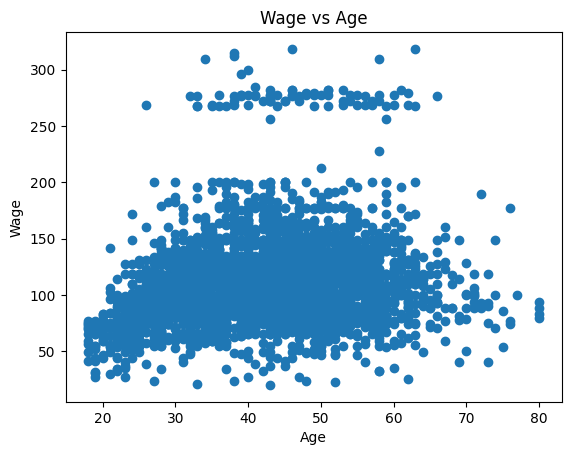

In [11]:
plt.scatter(x[:,1], y)
plt.xlabel("Age")
plt.ylabel("Wage")
plt.title("Wage vs Age")

Text(0.5, 1.0, 'Wage vs Education')

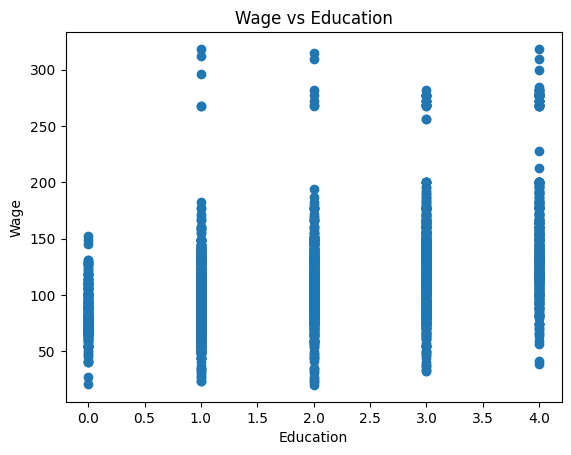

In [12]:
plt.scatter(x[:,2], y)
plt.xlabel("Education")
plt.ylabel("Wage")
plt.title("Wage vs Education")

### Fitting the GAM

The first two variables (age and year) are discrete quantitative so we use natural splines over them, while the third (education class) is qualitative so we use factors, i.e. assigning a separate constant factor to each one.

After fitting, we can predict an outcome as a linear combination of functions of our three predictors, with two functions composed of splines and one composed of factors. A nice thing about GAMs is we can see what each of these functions is--they're called Partial Dependence Functions (https://pygam.readthedocs.io/en/latest/notebooks/quick_start.html#Partial-Dependence-Functions).

Let's see it! 

In [28]:
gam = pygam.LinearGAM(pygam.s(0) + pygam.s(1) + pygam.f(2))
gam.fit(x,y)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + s(1) + f(2) + intercept, 
   tol=0.0001, verbose=False)

In [29]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     25.1911
Link Function:                     IdentityLink Log Likelihood:                                -24118.6847
Number of Samples:                         3000 AIC:                                            48289.7516
                                                AICc:                                           48290.2307
                                                GCV:                                             1255.6902
                                                Scale:                                           1236.7251
                                                Pseudo R-Squared:                                   0.2955
Feature Function                  Lam

/var/folders/0v/k0bzhvd900gd2q39m4qbtlkw0000gn/T/ipykernel_44480/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


### Our Fitted Functions

Let's take a look at the functions we've fit for each predictor. We even get prediction intervals straight from the gam object! The sum of the functions themselves (conditional on predictors) gives us the expectation for what we're putting in the link function, but there's also uncertainty we can propagate forward to do things like draw samples from a posterior--or generate intervals for our partial dependence functions. 

Text(0.5, 1.0, 'Spline for Wage as function of Year')

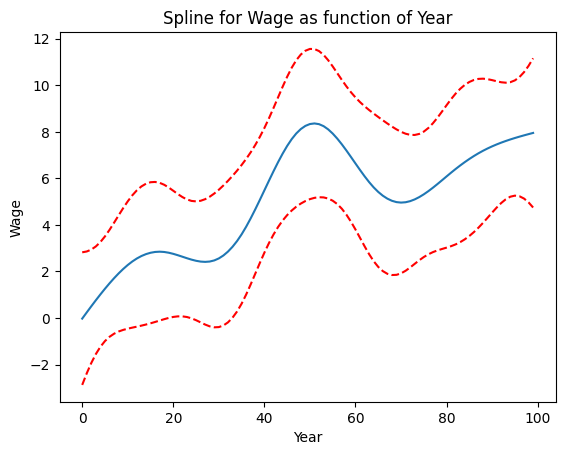

In [51]:
plt.plot(gam.partial_dependence(term=0))
plt.plot(gam.partial_dependence(term=0, width=0.95)[1],  c='r', ls='--')
plt.xlabel("Year")
plt.ylabel("Wage")
plt.title("Spline for Wage as function of Year")

Text(0.5, 1.0, 'Spline for Wage as function of Age')

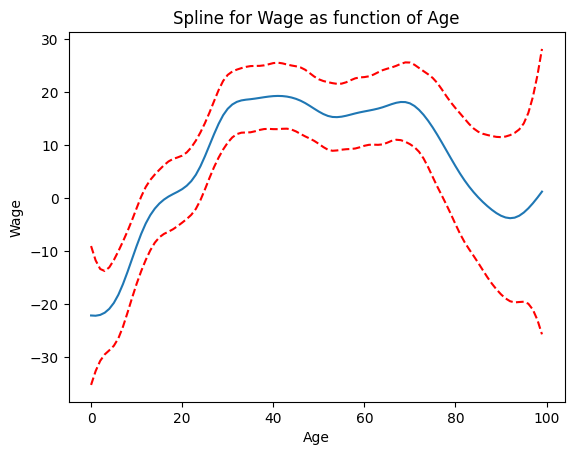

In [50]:
plt.plot(gam.partial_dependence(term=1))
plt.plot(gam.partial_dependence(term=1, width=0.95)[1],  c='r', ls='--')
plt.xlabel("Age")
plt.ylabel("Wage")
plt.title("Spline for Wage as function of Age")

Text(0.5, 1.0, 'Factors for Wage as function of Education')

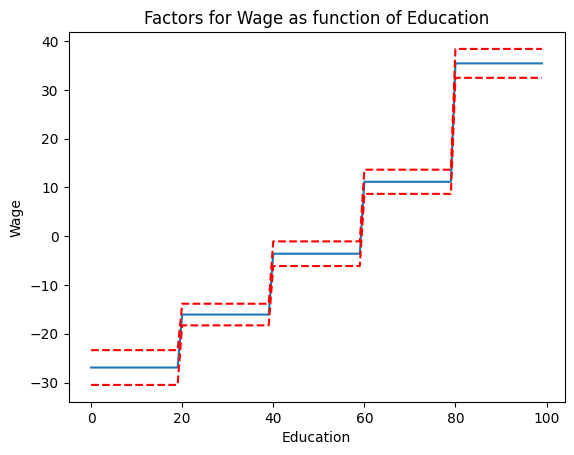

In [49]:
plt.plot(gam.partial_dependence(term=2))
plt.plot(gam.partial_dependence(term=2, width=0.95)[1],  c='r', ls='--')
plt.xlabel("Education")
plt.ylabel("Wage")
plt.title("Factors for Wage as function of Education")

In [67]:
XX_list = []

for i in range(3):
    XX = gam.generate_X_grid(term=i)
    XX_list.append(XX)

X_grid_vals = XX_list[0] + XX_list[1] + XX_list[2]
#gam.predict(Xg)

In [69]:
y_hat = gam.predict(X_grid_vals)
y_hat

array([ 47.2235565 ,  47.44388049,  47.86136622,  48.53390749,
        49.5193981 ,  50.87573185,  52.66060513,  54.87401637,
        57.37840854,  60.01616341,  62.62966271,  65.06128819,
        67.15500487,  68.83762777,  70.1578537 ,  71.17413559,
        71.94492637,  72.52867897,  72.98470189,  73.3895091 ,
        84.69477001,  85.27509174,  86.08274462,  87.21077791,
        88.73793459,  90.59826413,  92.64179985,  94.7175402 ,
        96.67448361,  98.36162851,  99.65542191, 100.58901559,
       101.25108468, 101.73036939, 102.11560991, 102.49554257,
       102.93641141, 103.42899858, 103.9482783 , 104.4692248 ,
       117.43765516, 117.88687997, 118.26583858, 118.55889751,
       118.75117965, 118.82780793, 118.77390523, 118.57532973,
       118.24463194, 117.8279807 , 117.3736885 , 116.93006782,
       116.54543115, 116.26541827, 116.09375301, 116.00087877,
       115.9563222 , 115.92960995, 115.89026869, 115.81196338,
       130.447664  , 130.33230106, 130.2359271 , 130.18

In [70]:
y_hat_intervals = gam.prediction_intervals(X_grid_vals, width=.95)
y_hat_intervals

array([[-23.3377297 , 117.7848427 ],
       [-22.55826837, 117.44602934],
       [-21.79849226, 117.52122469],
       [-20.94747931, 118.01529429],
       [-19.89154518, 118.93034139],
       [-18.51754193, 120.26900564],
       [-16.72042363, 122.0416339 ],
       [-14.47725064, 124.22528338],
       [-11.93754385, 126.69436094],
       [ -9.27727028, 129.3095971 ],
       [ -6.66156294, 131.92088835],
       [ -4.23962545, 134.36220183],
       [ -2.14857622, 136.45858596],
       [ -0.45336384, 138.12861938],
       [  0.88196422, 139.43374318],
       [  1.90322972, 140.44504145],
       [  2.66709849, 141.22275425],
       [  3.24277602, 141.81458192],
       [  3.70577964, 142.26362415],
       [  4.13309236, 142.64592584],
       [ 15.55832586, 153.83121416],
       [ 16.14810083, 154.40208266],
       [ 16.95222483, 155.21326441],
       [ 18.07400532, 156.34755049],
       [ 19.60479485, 157.87107432],
       [ 21.47516398, 159.72136427],
       [ 23.52216142, 161.76143828],
 

### Use 2D example to demonstrate showing predictions and drawing from posterior

easier for plotting :)


mcycle data is "A dataset containing 133 observations from a simulated motorcycle accident, used to test crash helmets. "
X is milliseconds after impact, y is acceleration of the head

In [83]:
X, y = mcycle()

In [85]:
gam = pygam.LinearGAM(pygam.s(0))
gam.gridsearch(X,y)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:000:00


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + intercept, tol=0.0001, 
   verbose=False)

Text(0, 0.5, 'G')

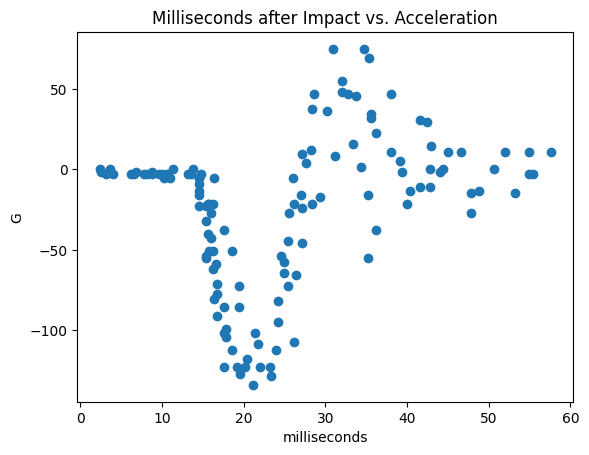

In [113]:
plt.scatter(X, y)
plt.title('Milliseconds after Impact vs. Acceleration')
plt.xlabel('milliseconds')
plt.ylabel('G')

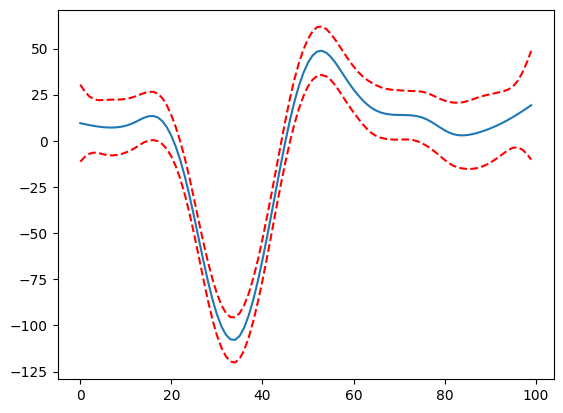

In [86]:
plt.plot(gam.partial_dependence(term=0))
plt.plot(gam.partial_dependence(term=0, width=0.95)[1],  c='r', ls='--')
# makes sense: since we only have one input, y = f(X1)

In [87]:
XX = gam.generate_X_grid(term=0)

array([[ 2.4       ],
       [ 2.95757576],
       [ 3.51515152],
       [ 4.07272727],
       [ 4.63030303],
       [ 5.18787879],
       [ 5.74545455],
       [ 6.3030303 ],
       [ 6.86060606],
       [ 7.41818182],
       [ 7.97575758],
       [ 8.53333333],
       [ 9.09090909],
       [ 9.64848485],
       [10.20606061],
       [10.76363636],
       [11.32121212],
       [11.87878788],
       [12.43636364],
       [12.99393939],
       [13.55151515],
       [14.10909091],
       [14.66666667],
       [15.22424242],
       [15.78181818],
       [16.33939394],
       [16.8969697 ],
       [17.45454545],
       [18.01212121],
       [18.56969697],
       [19.12727273],
       [19.68484848],
       [20.24242424],
       [20.8       ],
       [21.35757576],
       [21.91515152],
       [22.47272727],
       [23.03030303],
       [23.58787879],
       [24.14545455],
       [24.7030303 ],
       [25.26060606],
       [25.81818182],
       [26.37575758],
       [26.93333333],
       [27

In [90]:
y_hat = gam.predict(XX)
y_hat_intervals = gam.prediction_intervals(XX, width=.95)


In [106]:
y_hat_intervals[:, 1]

array([ 49.69832229,  47.66863852,  46.17778894,  45.16884185,
        44.54429853,  44.18731466,  43.98766526,  43.88660917,
        43.91246388,  44.12060449,  44.56258922,  45.27362959,
        46.27063828,  47.4587275 ,  48.58539975,  49.37193919,
        49.51735927,  48.70121072,  46.60605372,  43.09649623,
        38.20549   ,  31.96349786,  24.37853619,  15.43542708,
         5.14267384,  -6.14121801, -17.85742118, -29.46266988,
       -40.43998801, -50.29249963, -58.56508058, -65.02133063,
       -69.50586835, -71.88211488, -72.03969275, -69.88722116,
       -65.40526967, -58.80485876, -50.34870507, -40.31841842,
       -29.02017626, -16.77630918,  -3.91789254,   9.20862712,
        22.24350414,  34.80017708,  46.46333266,  56.80655012,
        65.581424  ,  72.76567859,  78.34099724,  82.26595325,
        84.47704488,  84.91848157,  83.77878461,  81.43913975,
        78.27279239,  74.62653114,  70.82128832,  67.14833401,
        63.75269486,  60.70384438,  58.05214513,  55.82

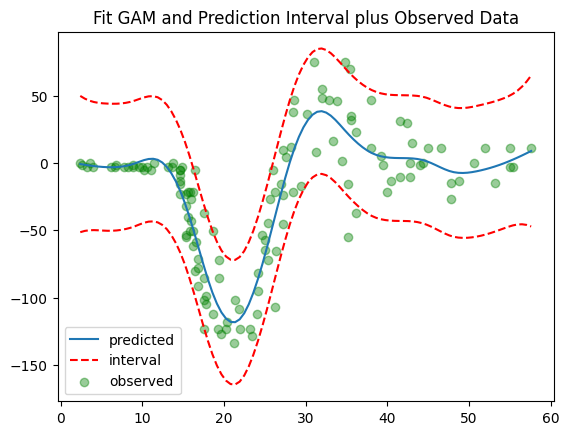

In [107]:
plt.plot(XX, y_hat, label='predicted')
plt.plot(XX, y_hat_intervals[:,0], color='r', ls='--', label='interval')
plt.plot(XX, y_hat_intervals[:,1], color='r', ls='--')
plt.scatter(X, y, color='g', alpha=0.4, label='observed')
plt.title('Fit GAM and Prediction Interval plus Observed Data')
plt.legend()